In [90]:
import pandas as pd
!pip install wordcloud
! pip install spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns

In [2]:
!python -m spacy download en_core_web_sm# install language model from spacy library to recognize language of text)

2022-11-30 11:51:32.936414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-30 11:51:32.936493: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 11:51:41.874009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-11-30 11:51:41.874080: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 11:51:41.881558: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-CT990RJ
2022-11-30 11:51:41.881805: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-CT990RJ
Traceback (most recent call last):
  File "C:\Users\berri\anaconda3\lib\site-packages\urllib3\connection.p

In [94]:
import pandas
elon =pd.read_csv("Elon_musk (1).csv",encoding='Latin-1')  
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


 # EDA 

In [95]:
elon.head() 

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [96]:
elon.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [97]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [98]:
elon.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [100]:
elon.shape

(1999, 2)

In [101]:
elon.corr()

,Unnamed: 0
Unnamed: 0,1.0


In [102]:
elon.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

## cleaning data

In [4]:

elon=[Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon=[Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:10] 

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
# Joining the list into one string/text
elon_text=' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
#Punctuation
no_punc_elon_text = elon_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_elon_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [7]:
#Tokenization
from nltk.tokenize import word_tokenize
elon_text_tokens = word_tokenize(no_punc_elon_text)
print(elon_text_tokens[0:50]) 

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [28]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in elon_text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [29]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [30]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40]) 

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [31]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [45]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [46]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [48]:
print(vectorizer.vocabulary_)

{'kunalb11': 2712, 'alien': 232, 'idaacarmack': 2449, 'ray': 3627, 'trace': 4508, 'cyberpunk': 968, 'hdr': 1686, 'nextlevel': 3164, 'have': 1680, 'try': 4544, 'joerogan': 2632, 'spotify': 4125, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1121, 'underestimate': 4677, 'teslacn': 4353, 'congratulations': 863, 'tesla': 4347, 'china': 746, 'amazing': 258, 'execution': 1335, 'last': 2731, 'year': 4949, 'now': 3204, 'next': 3163, 'even': 1307, 'happy': 1667, 'new': 3160, 'ox': 3320, 'httpstco9wfkmyu2oj': 1875, 'frodo': 1503, 'underdoge': 4676, 'all': 235, 'thought': 4432, 'would': 4925, 'fail': 1371, 'himself': 1730, 'httpstcozgxjfdzzrm': 2408, 'owensparks': 3317, 'flcnhvy': 1445, 'anonyx10': 287, 'haha': 1653, 'thank': 4390, 'indeed': 2498, 'tweets': 4567, 'definitely': 1023, 'represent': 3711, 'realworld': 3652, 'time': 4451, 'allocation': 237, 'the': 4398, 'entertaining': 1263, 'outcome': 3296, 'likely': 2792, 'givedirectly': 1590, 'just': 2660, 'send': 3898, 'agree': 201, '

In [49]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
print(X.toarray().shape) 

(15795, 4983)


In [38]:
#### Let's see how can bigrams and trigrams can be included here


In [51]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(elon) 

In [52]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [41]:
#### TFidf vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(elon)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

##  Generate wordcloud

In [60]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

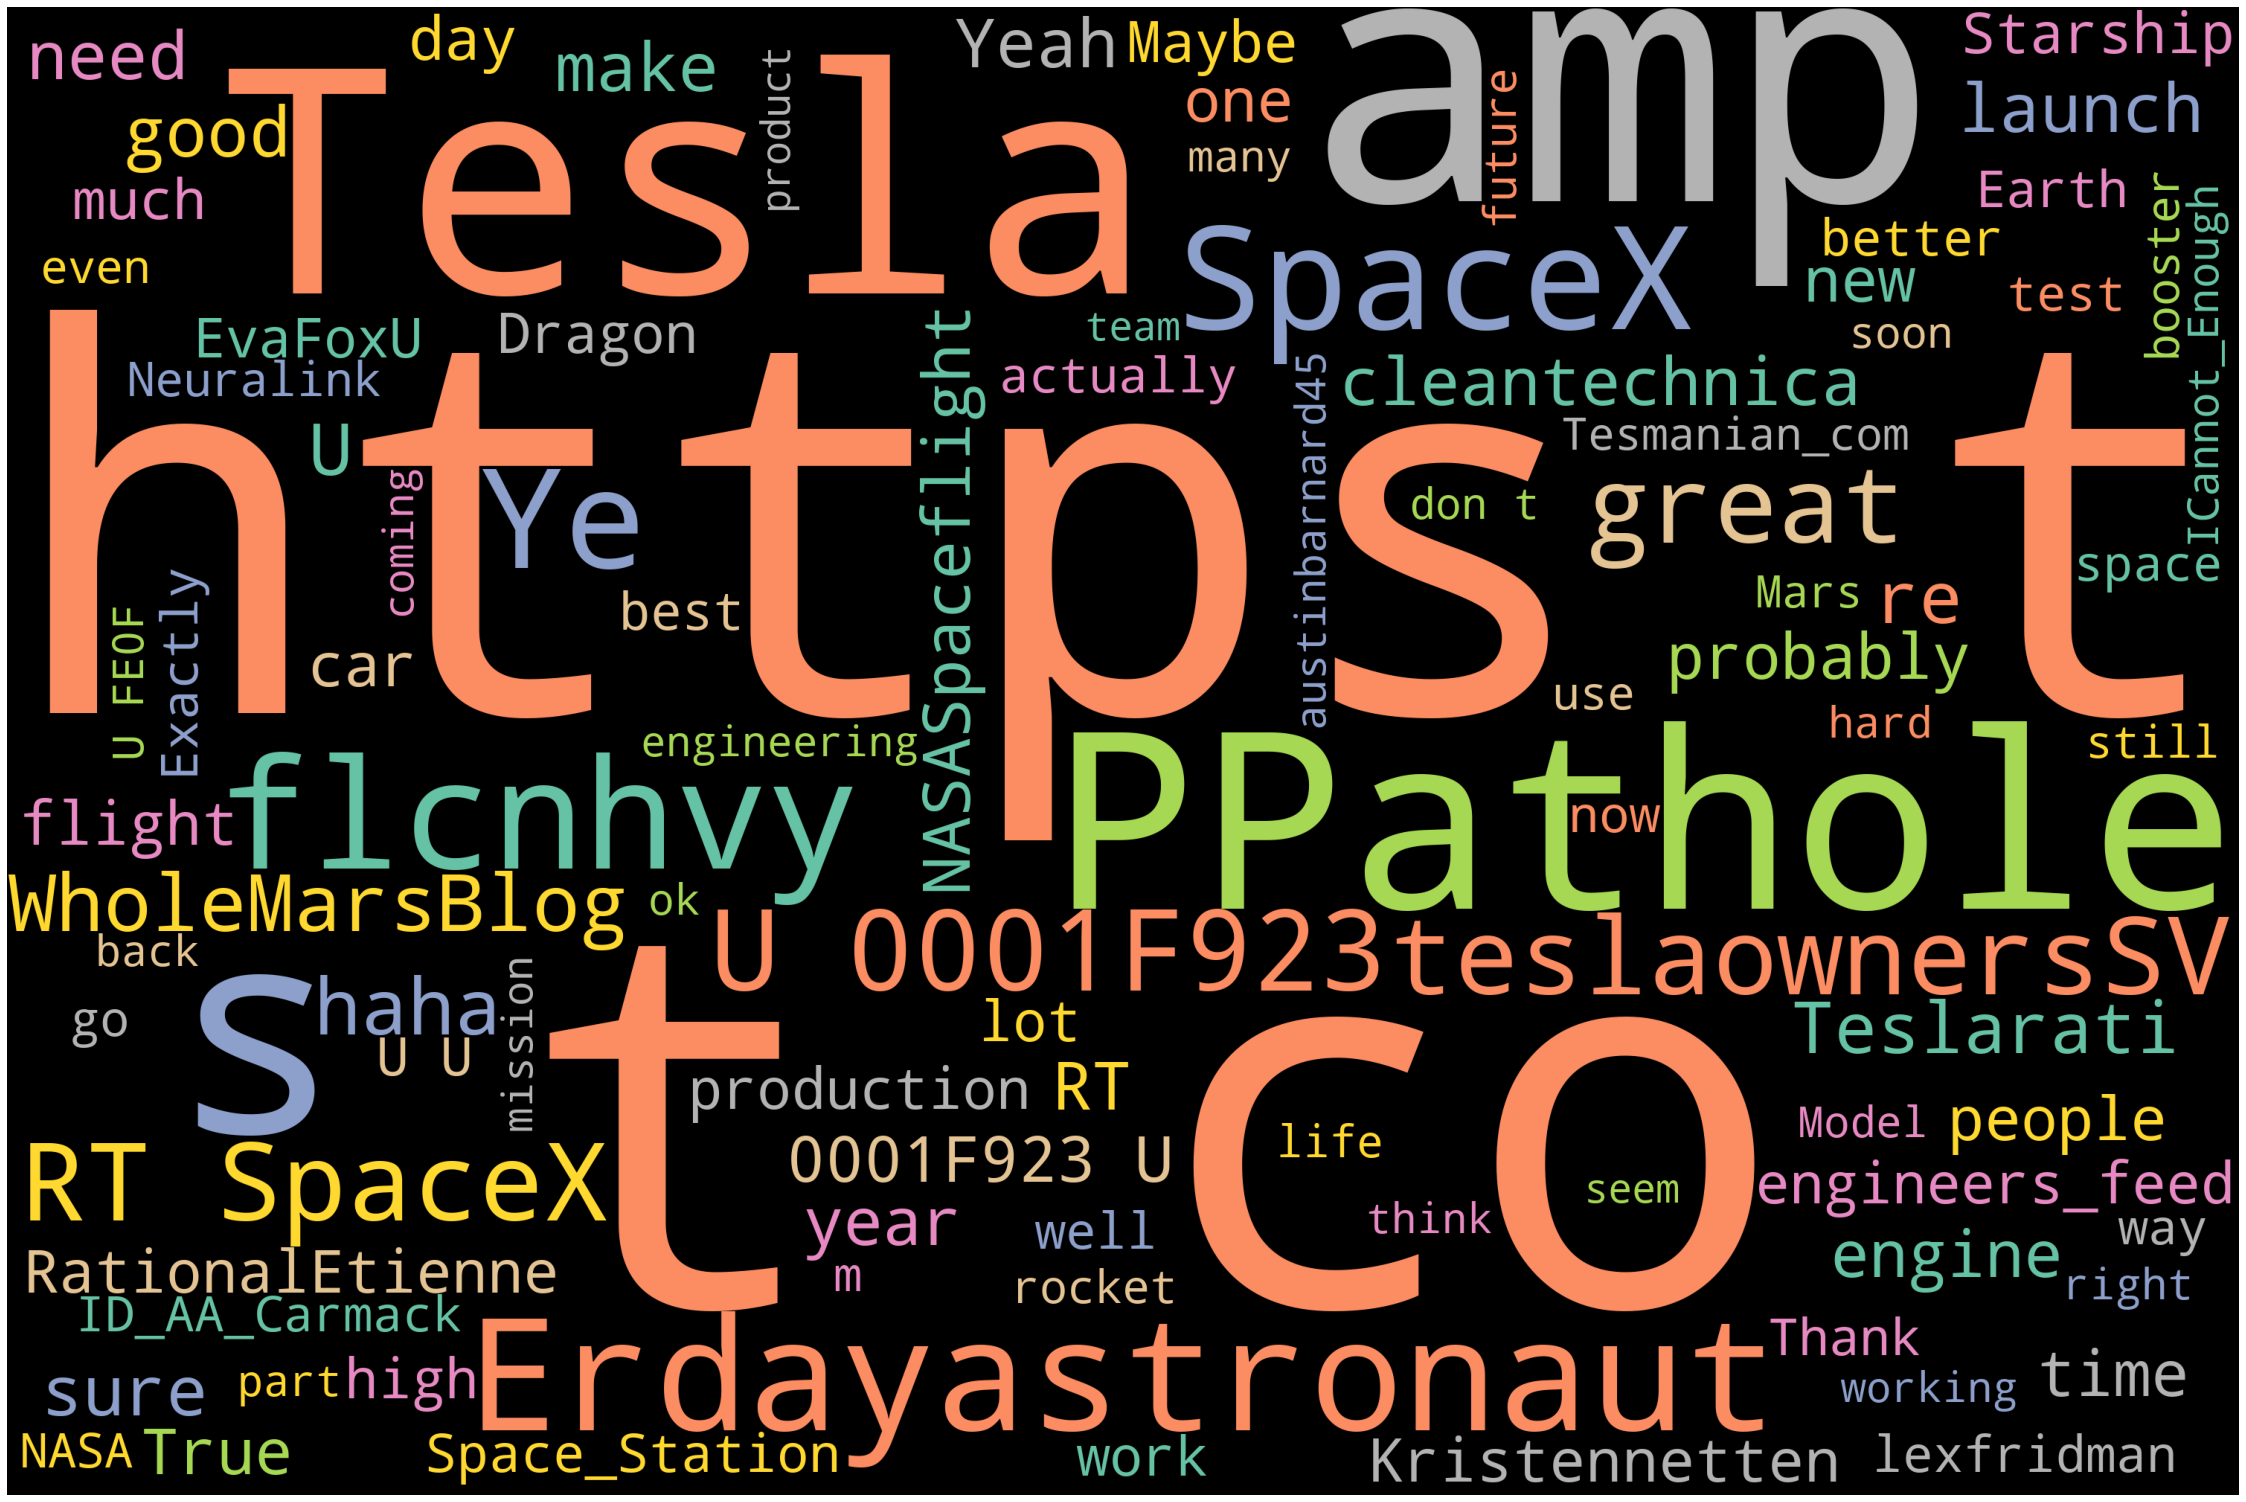

In [62]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(elon_text)
# Plot
plot_cloud(wordcloud)

In [63]:
#Named Entity Recognition (NER)
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block= elon_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [64]:
for token in doc_block[100:200]:
    print(token,token.pos_)

most ADV
entertaining ADJ
outcome NOUN
is AUX
the DET
most ADV
likely ADJ
@GiveDirectly ADV
Just ADV
sent VERB
some PRON
Just ADV
agree VERB
to PART
do VERB
Clubhouse NOUN
with ADP
@kanyewest ADJ
https://t.co/3rWE9uHSTS X
@geoffkeighley PROPN
@UnrealEngine PROPN
Its PROPN
getting VERB
real ADJ
Bought PROPN
some DET
Dogecoin PROPN
for ADP
lil PROPN
X PROPN
, PUNCT
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
@JoshManMode NOUN
He PRON
definitely ADV
has VERB
issues NOUN
, PUNCT
but CCONJ
the DET
sentencing NOUN
seems VERB
a DET
bit NOUN
high ADJ
@freewalletorg PROPN
Thanks NOUN
for ADP
fixing VERB
@freewalletorg PROPN
Please INTJ
unlock VERB
my PRON
account NOUN
@AstroJordy PROPN
< X
U+0001F923><U+0001F923 X
> X
This PRON
is AUX
true ADJ
power NOUN
haha NOUN
https://t.co/Fc9uhQSd7O X
@freewalletorg PUNCT
Any DET
crypto NOUN
wallet NOUN
that PRON
wont PROPN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN
@free

In [65]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


['missing', 'work', 'go', 'seem', 'bit', 'appears', 'fixed', '#', 'coins', 'unit', 'time', 'https://t.co/4UH4rARC6', 'T', '_', 'launch', 'tower', 'stack', 'Raptors', 'orbit', 'booster', 'Improve', 'ship', 'booster', 'mass', '@michaelhodapp', 'work', 'tonight', 'video', 'https://t.co/UEEocOfcTb', 'people', 'spoken', '@Nivetha_7_42', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'rainforests', 'come', 'crypto', 'simplicity', 'genius', '@AstroJordy', 'decades', 'work', 'Have', 'look', 'notes', 'emails', 'texts', 'Lessons', 'learned', 'tell', 'story', '@TheOnion', 'read', 'heard', 'name', 'years', 'https://t.co/cnOf9yjpF1', '@OwenSparks', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'currency', 'scratch', 'said', 'ship', 'landing', 'burn', 'has', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'thrusters', 'https://t.co/vsO9h4Ioed', '@SpaceX', 'seem', 'turbopump', 'have', 'mu', '@NASASpaceflight', 'launch', 'SPHEREx', 'mission', 'collect', 'data', '

In [66]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,co,204
1,https,202
2,ppathole,78
3,wholemarsblog,63
4,have,48
5,nasaspaceflight,46
6,launch,42
7,spacex,41
8,make,33
9,people,31


In [68]:
#Emotion Mining - Sentiment Analysis


In [69]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(elon_text_tokens))
sentences

['kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge All thought he would fail Himself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalle

# Sentiment Analysis


In [71]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(elon))
sentences


['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [72]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [73]:
# Emotion Lexicon - Affin
df =pd.read_csv('Elon_musk.csv',sep=',',encoding='Latin-1')

In [74]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [75]:
df_scores=df.set_index('Unnamed: 0')['Text'].to_dict()
df_scores

{1: '@kunalb11 I\x92m an alien',
 2: '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 3: '@joerogan @Spotify Great interview!',
 4: '@gtera27 Doge is underestimated',
 5: '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 6: 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 7: 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 8: '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 9: '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 10: 'The most entertaining outcome is the most likely',
 11: '@GiveDirectly Just sent some',
 12: 'Just agree to do Clubhouse with @kanyewest',
 13: 'https://t.co/3rWE9uHSTS',
 14: '@geoffkeighley @UnrealEngine It\x92s getting real',
 15: 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 16: '@JoshManMode He definitely has issues, but the sentencing 

In [76]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon= df_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [77]:
# manual testing
calculate_sentiment(text='good service')

0

In [78]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      0
3      0
4      0
      ..
919    0
920    0
921    0
922    0
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [79]:
sent_df.sort_values(by='sentiment_value')


,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
609,"Support of greater Boca, Padre, Brownsville co...",0
610,SN8 Starship with flaps &amp; nosecone should ...,0
611,"Then static fire, checkouts, static fire, fly ...",0
612,@SpacePadreIsle @BocaChicaGal @NASASpaceflight...,0
...,...,...
312,"Expect two steps forward, one back.",0
313,Lot of new code was merged.,0
314,@austinbarnard45 Just a scratch.,0
316,@erujabidi Am getting wildly different results...,0


In [80]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: sentiment_value, dtype: float64

In [81]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",0
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0


In [82]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=0]

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",0
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0


In [83]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0
1,Have you tried it?,0,1
2,@joerogan @Spotify Great interview!,0,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,3
4,Now on to the next for even more!!,0,4
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,919
920,"It may never pay out, as the stock cant b ht...",0,920
921,Details Aug 28.,0,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,922


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

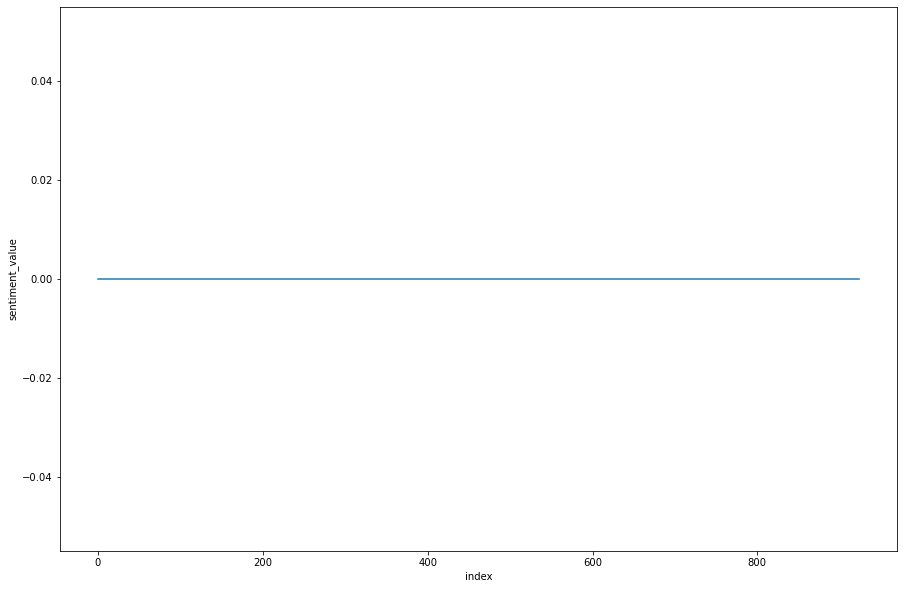

In [85]:
# Plotting the line plot for sentiment value of whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

### histogram

<AxesSubplot:ylabel='Count'>

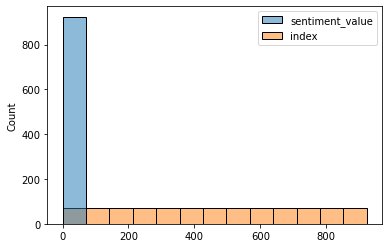

In [86]:
sns.histplot(sent_df)

### pair plot

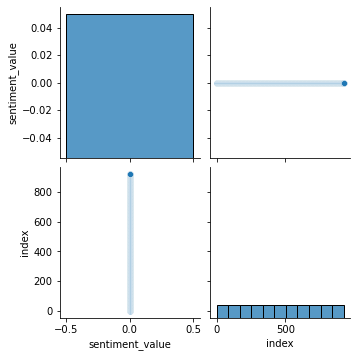

In [87]:
sns.pairplot(sent_df)